![](https://businessoptions.in/assets/uploads/franchise/gallery/8g8t6begnzezdxsg1zvs.jpg)


The data scientists at Big Mart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, Big Mart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly

# Variable Description
ProductID : unique product ID
Weight : weight of products
FatContent : specifies whether the product is low on fat or not
Visibility : percentage of total display area of all products in a store allocated to the particular product
ProductType : the category to which the product belongs
MRP : Maximum Retail Price (listed price) of the products
OutletID : unique store ID
EstablishmentYear : year of establishment of the outlets
OutletSize : the size of the store in terms of ground area covered
LocationType : the type of city in which the store is located
OutletType : specifies whether the outlet is just a grocery store or some sort of supermarket
OutletSales : (target variable) sales of the product in the particular store


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline

In [2]:
df=pd.read_csv('bigmart_sale_data02.csv')         ######## import dataset
df

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df.info()                                      ########### dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.describe()                                   #### statistical calculation

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
df.size                              ###### size of dataset

102276

In [6]:
df.shape                              #### total row and column

(8523, 12)

In [7]:
df.index                              #### find index

RangeIndex(start=0, stop=8523, step=1)

In [8]:
df.columns                             ####### find column

Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType', 'OutletSales'],
      dtype='object')

In [9]:
df.dtypes                            ##### types of dataset inside inforation

ProductID             object
Weight               float64
FatContent            object
ProductVisibility    float64
ProductType           object
MRP                  float64
OutletID              object
EstablishmentYear      int64
OutletSize            object
LocationType          object
OutletType            object
OutletSales          float64
dtype: object

In [10]:
df.duplicated().sum()                        #### find duplicate value 

0

In [11]:
df.apply(lambda x:len(x.unique()))        ##### find unique value

ProductID            1559
Weight                416
FatContent              5
ProductVisibility    7880
ProductType            16
MRP                  5938
OutletID               10
EstablishmentYear       9
OutletSize              4
LocationType            3
OutletType              4
OutletSales          3493
dtype: int64

In [12]:
df.isna().sum()                             ####### find  null value inside of dataset

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [13]:
data=df.fillna(0)                       #######  make data vaiable and then put 0 in  null value place
data

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,0,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


<AxesSubplot:>

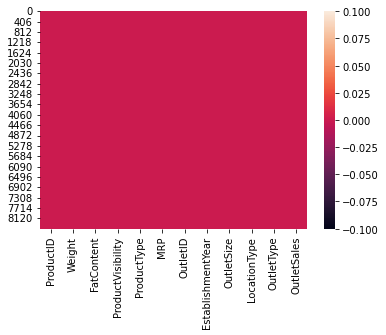

In [14]:
sns.heatmap(data.isnull())                    #### heatmap through find null value

In [15]:
data.isna().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [16]:
data.max()                       ############ maximumn output in inside of dataset

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_8488/277783583.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.max()                       ############ maximumn output in inside of dataset


ProductID                        NCZ54
Weight                           21.35
FatContent                         reg
ProductVisibility             0.328391
ProductType              Starchy Foods
MRP                           266.8884
OutletID                        OUT049
EstablishmentYear                 2009
LocationType                    Tier 3
OutletType           Supermarket Type3
OutletSales                 13086.9648
dtype: object

In [17]:
data['OutletSales'].max()              ####### outlet sale maximum value

13086.9648

In [18]:
data.min()                            ########### minmum value in dataset

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_8488/1175637117.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.min()                            ########### minmum value in dataset


ProductID                    DRA12
Weight                         0.0
FatContent                      LF
ProductVisibility              0.0
ProductType           Baking Goods
MRP                          31.29
OutletID                    OUT010
EstablishmentYear             1985
LocationType                Tier 1
OutletType           Grocery Store
OutletSales                  33.29
dtype: object

In [19]:
data['OutletSales'].min()         ######### outsales mininum

33.29

In [20]:
data.OutletSales.sum()              ########### ouletsales sum calculated value

18591125.4104

In [21]:
data.EstablishmentYear.min()            ######## mimimum year


1985

In [22]:
data.EstablishmentYear.max()        #####maximum year

2009

In [23]:
data[(data['ProductType'] == 'Snack Foods') & (data['EstablishmentYear'] == 1999)]  ### only snackfood product type and year 1999 realted information
                                                                                          

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
42,FDA46,13.600,Low Fat,0.117818,Snack Foods,192.9136,OUT049,1999,Medium,Tier 1,Supermarket Type1,2527.3768
76,FDQ10,12.850,Low Fat,0.033231,Snack Foods,172.3422,OUT049,1999,Medium,Tier 1,Supermarket Type1,1207.0954
102,FDW57,8.310,Regular,0.115857,Snack Foods,179.1028,OUT049,1999,Medium,Tier 1,Supermarket Type1,3896.2616
191,FDL58,5.780,Regular,0.074264,Snack Foods,264.7568,OUT049,1999,Medium,Tier 1,Supermarket Type1,4745.8224
354,FDU09,7.710,Regular,0.066701,Snack Foods,55.2956,OUT049,1999,Medium,Tier 1,Supermarket Type1,1255.6988
...,...,...,...,...,...,...,...,...,...,...,...,...
8321,FDQ33,13.350,Low Fat,0.091349,Snack Foods,150.3708,OUT049,1999,Medium,Tier 1,Supermarket Type1,4363.6532
8347,FDB10,10.000,Low Fat,0.067313,Snack Foods,234.3590,OUT049,1999,Medium,Tier 1,Supermarket Type1,3072.6670
8364,FDT58,9.000,Low Fat,0.086088,Snack Foods,168.7816,OUT049,1999,Medium,Tier 1,Supermarket Type1,3355.6320
8451,FDK21,7.905,Low Fat,0.010028,Snack Foods,249.6408,OUT049,1999,Medium,Tier 1,Supermarket Type1,3254.4304


In [24]:
data.groupby('ProductType').ProductType.count ()      ####### groupby product type

ProductType
Baking Goods              648
Breads                    251
Breakfast                 110
Canned                    649
Dairy                     682
Frozen Foods              856
Fruits and Vegetables    1232
Hard Drinks               214
Health and Hygiene        520
Household                 910
Meat                      425
Others                    169
Seafood                    64
Snack Foods              1200
Soft Drinks               445
Starchy Foods             148
Name: ProductType, dtype: int64

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ProductType', ylabel='count'>

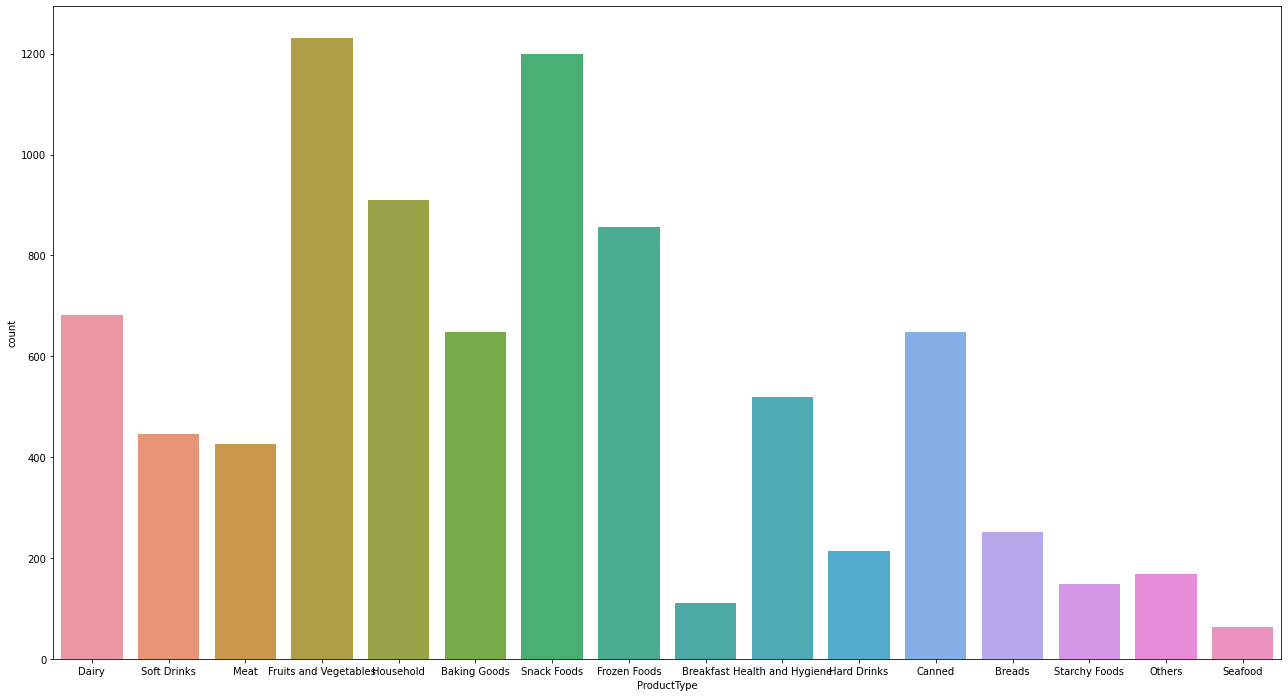

In [25]:
plt.figure(figsize=(22,12))
sns.countplot(data['ProductType'])           ############# product type countplot 


In [26]:
data[(data['FatContent'] == 'Low Fat') ]            ###### only low fat fat content information

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
7,FDP10,0.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
10,FDY07,11.800,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
...,...,...,...,...,...,...,...,...,...,...,...,...
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136


In [27]:
data[(data['FatContent'] == 'Low Fat')& (data['ProductType'] == 'Fruits and Vegetables')& (data['EstablishmentYear'] == 2007)] 
############## fat content low fat,producttype Fruits and Vegetables and year 2007 this information

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
53,FDA43,10.895,Low Fat,0.065042,Fruits and Vegetables,196.3794,OUT017,2007,0,Tier 2,Supermarket Type1,3121.2704
138,FDX44,9.300,Low Fat,0.043210,Fruits and Vegetables,90.8172,OUT017,2007,0,Tier 2,Supermarket Type1,535.3032
171,FDK44,16.600,Low Fat,0.122919,Fruits and Vegetables,173.0738,OUT017,2007,0,Tier 2,Supermarket Type1,3823.0236
554,FDT31,19.750,Low Fat,0.012519,Fruits and Vegetables,190.6872,OUT017,2007,0,Tier 2,Supermarket Type1,4916.2672
662,FDJ08,11.100,Low Fat,0.111298,Fruits and Vegetables,191.7846,OUT017,2007,0,Tier 2,Supermarket Type1,3057.3536
673,FDA44,19.700,Low Fat,0.053524,Fruits and Vegetables,55.3930,OUT017,2007,0,Tier 2,Supermarket Type1,1471.4180
955,FDV07,9.500,Low Fat,0.000000,Fruits and Vegetables,110.4228,OUT017,2007,0,Tier 2,Supermarket Type1,1547.3192
1777,FDA20,6.780,Low Fat,0.066998,Fruits and Vegetables,186.5240,OUT017,2007,0,Tier 2,Supermarket Type1,2609.9360
1877,FDS55,7.020,Low Fat,0.081623,Fruits and Vegetables,148.0734,OUT017,2007,0,Tier 2,Supermarket Type1,1930.1542
2002,FDW56,7.680,Low Fat,0.071301,Fruits and Vegetables,190.8162,OUT017,2007,0,Tier 2,Supermarket Type1,2693.8268


In [28]:
data.OutletType

0       Supermarket Type1
1       Supermarket Type2
2       Supermarket Type1
3           Grocery Store
4       Supermarket Type1
              ...        
8518    Supermarket Type1
8519    Supermarket Type1
8520    Supermarket Type1
8521    Supermarket Type2
8522    Supermarket Type1
Name: OutletType, Length: 8523, dtype: object

In [29]:
data[(data['FatContent'] == 'Low Fat')& (data['ProductType'] == 'Fruits and Vegetables')& (data['OutletType'] == 'Grocery Store')]  
######## find only information about fat content low fat,producttype Fruits and Vegetables and OutletType is Grocery Store

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
90,FDW20,20.75,Low Fat,0.040421,Fruits and Vegetables,122.1730,OUT010,1998,0,Tier 3,Grocery Store,369.5190
174,FDI32,17.70,Low Fat,0.291865,Fruits and Vegetables,115.1834,OUT010,1998,0,Tier 3,Grocery Store,345.5502
284,FDJ08,0.00,Low Fat,0.193773,Fruits and Vegetables,190.3846,OUT019,1985,Small,Tier 1,Grocery Store,573.2538
286,FDE08,18.20,Low Fat,0.082551,Fruits and Vegetables,147.3734,OUT010,1998,0,Tier 3,Grocery Store,296.9468
540,FDA44,19.70,Low Fat,0.089084,Fruits and Vegetables,54.5930,OUT010,1998,0,Tier 3,Grocery Store,56.5930
...,...,...,...,...,...,...,...,...,...,...,...,...
8206,FDX08,0.00,Low Fat,0.039577,Fruits and Vegetables,179.9318,OUT019,1985,Small,Tier 1,Grocery Store,360.8636
8365,FDA19,7.52,Low Fat,0.092272,Fruits and Vegetables,128.7994,OUT010,1998,0,Tier 3,Grocery Store,128.4994
8405,FDB09,0.00,Low Fat,0.100493,Fruits and Vegetables,123.1046,OUT019,1985,Small,Tier 1,Grocery Store,124.5046
8458,FDX20,0.00,Low Fat,0.074518,Fruits and Vegetables,227.3720,OUT019,1985,Small,Tier 1,Grocery Store,452.7440


In [30]:
data.assign()          

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,0,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


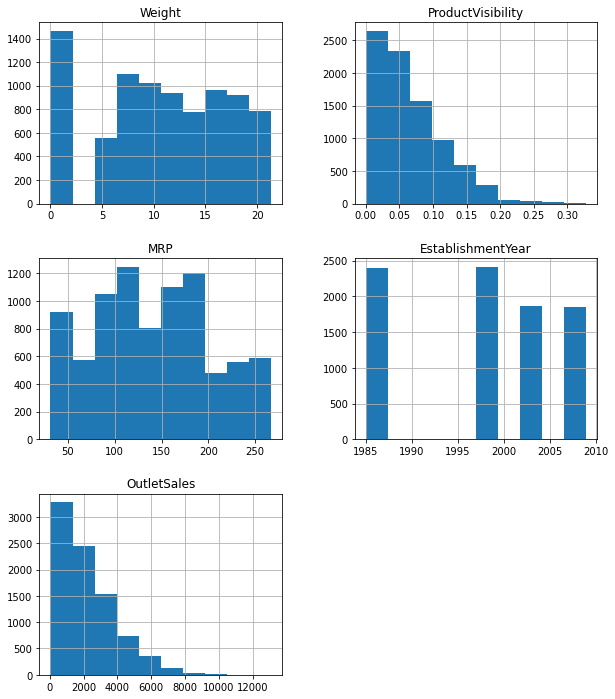

In [31]:
def show_hist(hist_):
    plt.rcParams['figure.figsize'] =10,12
    hist_.hist()
                                                               ############ hist chart
show_hist(data)

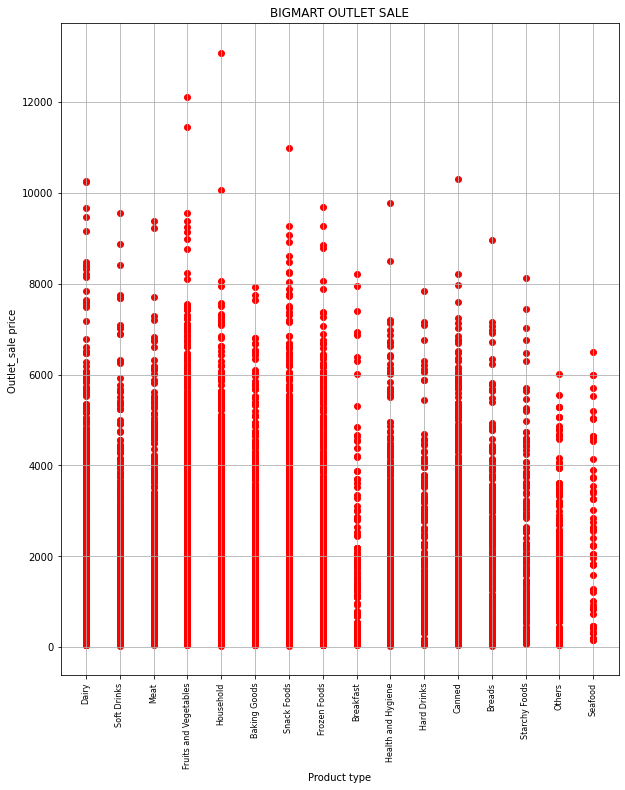

In [36]:
plt.scatter(data.ProductType,data.OutletSales,color='r')
plt.xticks(rotation='vertical',size=8)
plt.title("BIGMART OUTLET SALE",color="black")
plt.xlabel("Product type",color="black")
plt.ylabel("Outlet_sale price ",color="black")
plt.grid()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

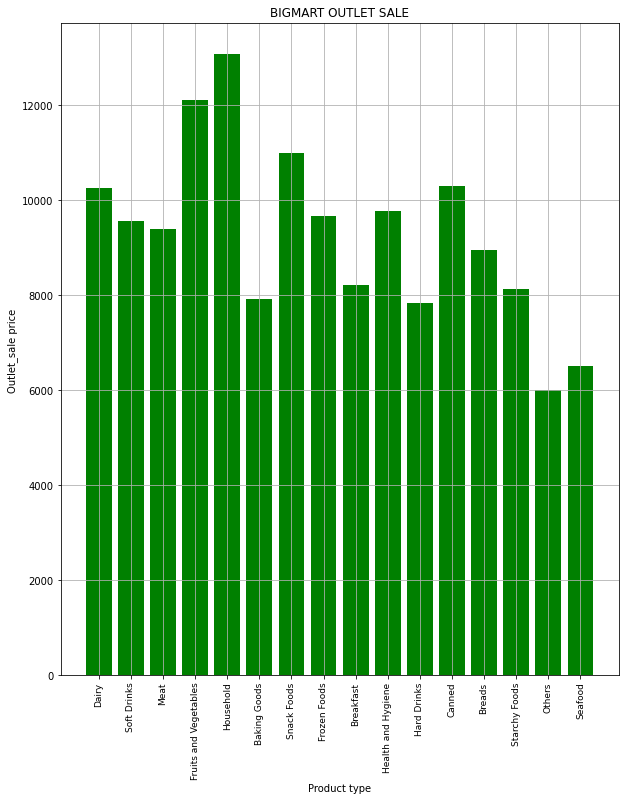

In [37]:
plt.bar(data['ProductType'],data['OutletSales'],color='g')
plt.xticks(rotation='vertical',size=9)
plt.title("BIGMART OUTLET SALE",color="black")
plt.xlabel("Product type",color="black")
plt.ylabel("Outlet_sale price ",color="black")
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

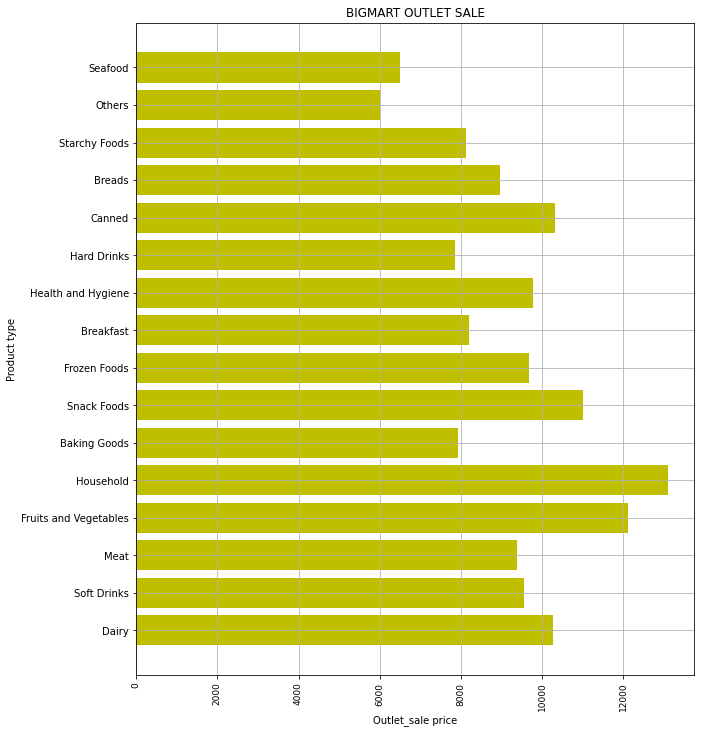

In [38]:
plt.barh(data['ProductType'],data['OutletSales'],color='y')
plt.xticks(rotation='vertical',size=9)
plt.title("BIGMART OUTLET SALE",color="black")
plt.xlabel("Outlet_sale price",color="black")
plt.ylabel("Product type",color="black")
plt.grid()
plt.show